<h1 class='font-effect-3d' style='color:#66FF66; font-family:Akronim;'>Styling, Links, Helpful Functions, & Code Modules</h1>

In [1]:
library(IRdisplay); library(repr)
library(readr); library('MASS')
library(tensorflow); library(keras)
library(nnet); library(caret); library(doParallel)
library(imager); library(R6)
path1<-"../input/digit-recognizer/"
path2<-"../input/boston-housing/"
fw1<-"best.digits.h5"
fw2<-"best.boston.h5"

Loading required package: lattice

Loading required package: ggplot2


Attaching package: ‘caret’


The following object is masked from ‘package:tensorflow’:

    train


The following object is masked from ‘package:httr’:

    progress


Loading required package: foreach

Loading required package: iterators

Loading required package: parallel

Loading required package: magrittr


Attaching package: ‘imager’


The following object is masked from ‘package:magrittr’:

    add


The following object is masked from ‘package:IRdisplay’:

    display


The following objects are masked from ‘package:stats’:

    convolve, spectrum


The following object is masked from ‘package:graphics’:

    frame


The following object is masked from ‘package:base’:

    save.image




In [2]:
display_html("<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d|fire-animation');
body {background-color:#AAF0D1;} 
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt {color:#FF9966;} 
div.input_prompt {color:#66FF66;} 
div.output_area pre,div.output_subarea {font-size:15px; color:#FF9966;}
div.output_stderr pre {background-color:#AAF0D1;} 
</style>")

<h1 class='font-effect-3d' style='color:#66FF66; font-family:Akronim;'>Data</h1>

[1] 42000   784 42000     1

[1] 28 28  2

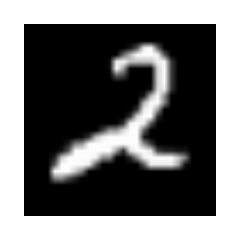

In [3]:
digits<-read.csv(paste0(path1,"train.csv"))
n<-nrow(digits)
digits<-digits[sample(n),]
digit_labels<-as.matrix(digits[,1])
fdigit_labels<-as.factor(digits$label)
digit_images<-as.matrix(digits[,-1])/255
c(dim(digit_images),dim(digit_labels))
options(repr.plot.width=2,repr.plot.height=2)
par(mar=c(1,1,1,1)); n<-sample(42000,1)
image_example<-digit_images[n,]
image_example<-array_reshape(image_example,c(28,28))
c(dim(image_example),digit_labels[n])
plot(as.raster(image_example))

In [4]:
train_indices<-1:round(.8*n)
valid_indices<-(round(.8*n)+1):round(.9*n)
test_indices<-(round(.9*n)+1):n
x_train1<-digit_images[train_indices,]
y_train1<-digit_labels[train_indices,]
x_valid1<-digit_images[valid_indices,]
y_valid1<-digit_labels[valid_indices,]
x_test1<-digit_images[test_indices,]
y_test1<-digit_labels[test_indices,]
cy_train1<-class.ind(y_train1)
cy_valid1<-class.ind(y_valid1)
cy_test1<-class.ind(y_test1)
c(dim(x_train1),dim(x_valid1),dim(x_test1),
  dim(cy_train1),dim(cy_valid1),dim(cy_test1))

[1] 8465  784 1058  784 1058  784 8465   10 1058   10 1058   10

In [5]:
data(Boston); nb<-dim(Boston)[1]
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [6]:
boston<-Boston[sample(nb),]
boston_features<-as.matrix(boston[,-14])
boston_targets<-as.matrix(boston[,14])
train_indices<-1:round(.8*nb)
valid_indices<-(round(.8*nb)+1):round(.9*nb)
test_indices<-(round(.9*nb)+1):nb
x_train2<-boston_features[train_indices,]
y_train2<-boston_targets[train_indices,]
x_valid2<-boston_features[valid_indices,]
y_valid2<-boston_targets[valid_indices,]
x_test2<-boston_features[test_indices,]
y_test2<-boston_targets[test_indices,]

<h1 class='font-effect-3d' style='color:#66FF66; font-family:Akronim;'>Classification</h1>
nnet & keras

In [7]:
dco<-detectCores() 
clu<-makeCluster(dco)
registerDoParallel(clu)

In [8]:
train_par<-trainControl(method="cv",number=3)
gnn<-expand.grid(.size=c(1,4,8,16),.decay=.1^5)
set.seed(42)
cnnet<-train(digit_images,fdigit_labels,trControl=train_par,
             method="nnet",tuneGrid=gnn,MaxNWts=20000)
cnnet

# weights:  12730
initial  value 109654.162694 
iter  10 value 44338.738798
iter  20 value 23407.724626
iter  30 value 14732.589573
iter  40 value 12400.846119
iter  50 value 10215.222148
iter  60 value 8545.595623
iter  70 value 7498.181407
iter  80 value 6575.425229
iter  90 value 5897.692938
iter 100 value 5425.837332
final  value 5425.837332 
stopped after 100 iterations


Neural Network 

42000 samples
  784 predictor
   10 classes: '0', '1', '2', '3', '4', '5', '6', '7', '8', '9' 

No pre-processing
Resampling: Cross-Validated (3 fold) 
Summary of sample sizes: 28001, 27999, 28000 
Resampling results across tuning parameters:

  size  Accuracy   Kappa    
   1    0.2335243  0.1447023
   4    0.7768792  0.7519663
   8    0.8749277  0.8609846
  16    0.9161907  0.9068490

Tuning parameter 'decay' was held constant at a value of 1e-05
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were size = 16 and decay = 1e-05.

In [9]:
stopCluster(clu)

In [10]:
cnnks<-keras_model_sequential()
cnnks %>% 
  layer_conv_2d(input_shape=c(28,28,1),
                filter=32,kernel_size=c(5,5),
                padding="same") %>%  
  layer_activation_leaky_relu(alpha=.02) %>%   
  layer_max_pooling_2d(pool_size=c(2,2)) %>%  
  layer_dropout(.25) %>%
  layer_conv_2d(filter=196,kernel_size=c(5,5),
                padding="same") %>% 
  layer_activation_leaky_relu(alpha=.02) %>%  
  layer_max_pooling_2d(strides=c(2,2)) %>%  
  layer_dropout(.25) %>%
  layer_global_max_pooling_2d() %>%  
  layer_dense(1024) %>%  
  layer_activation_leaky_relu(alpha=.02) %>% 
  layer_dropout(.25) %>%    
  layer_dense(10) %>%    
  layer_activation("softmax")
cnnks %>%
  compile(loss="categorical_crossentropy",
          optimizer="nadam",metrics="accuracy")

`geom_smooth()` using formula 'y ~ x'



$loss
[1] 0.04082912

$acc
[1] 0.9867675

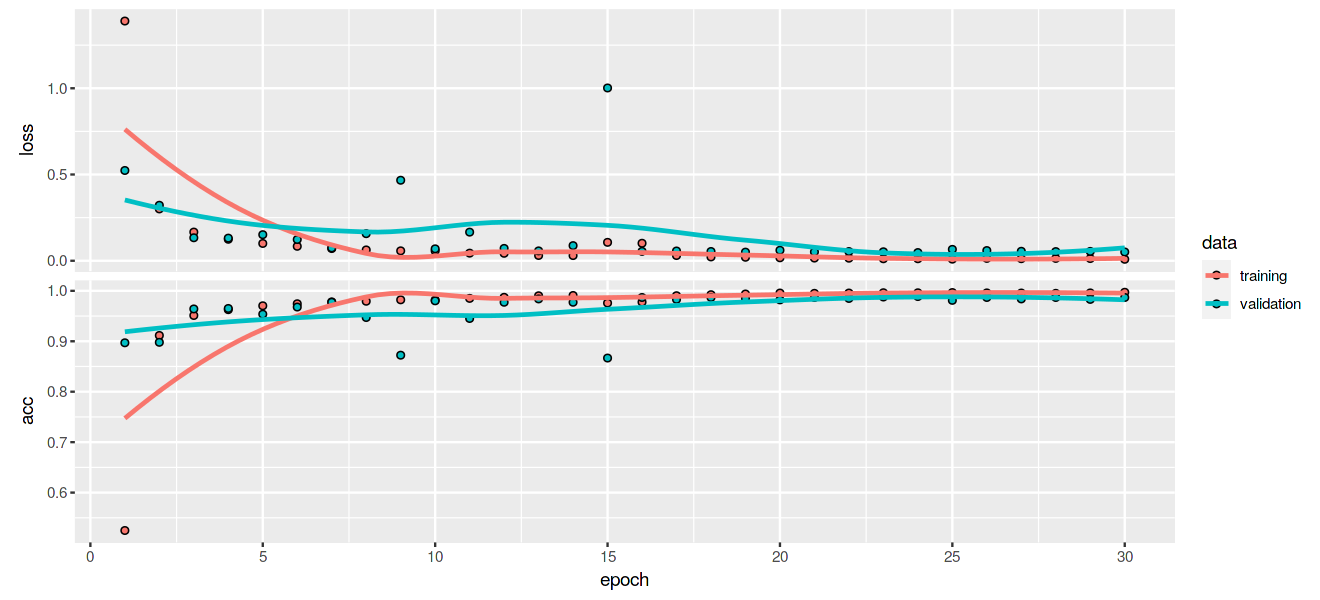

In [11]:
d<-c(dim(x_train1)[1],28,28,1)
dv<-c(dim(x_valid1)[1],28,28,1)
dt<-c(dim(x_test1)[1],28,28,1)
cb<-list(callback_model_checkpoint(fw1,save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",factor=.75))
cnn_fit<-cnnks %>%
    fit(x=array_reshape(x_train1,d),y=cy_train1,
        validation_data=list(array_reshape(x_valid1,dv),cy_valid1),
        shuffle=T,batch_size=128,epochs=30,callbacks=cb)
options(warn=-1,repr.plot.width=11,repr.plot.height=5)
plot(cnn_fit)
load_model_weights_hdf5(cnnks,fw1)
cnnks %>% 
    evaluate(array_reshape(x_test1,dt),cy_test1)

<h1 class='font-effect-3d' style='color:#66FF66; font-family:Akronim;'>Regression</h1>
nnet & keras

a 13-52-1 network with 781 weights
options were - linear output units  decay=1e-04

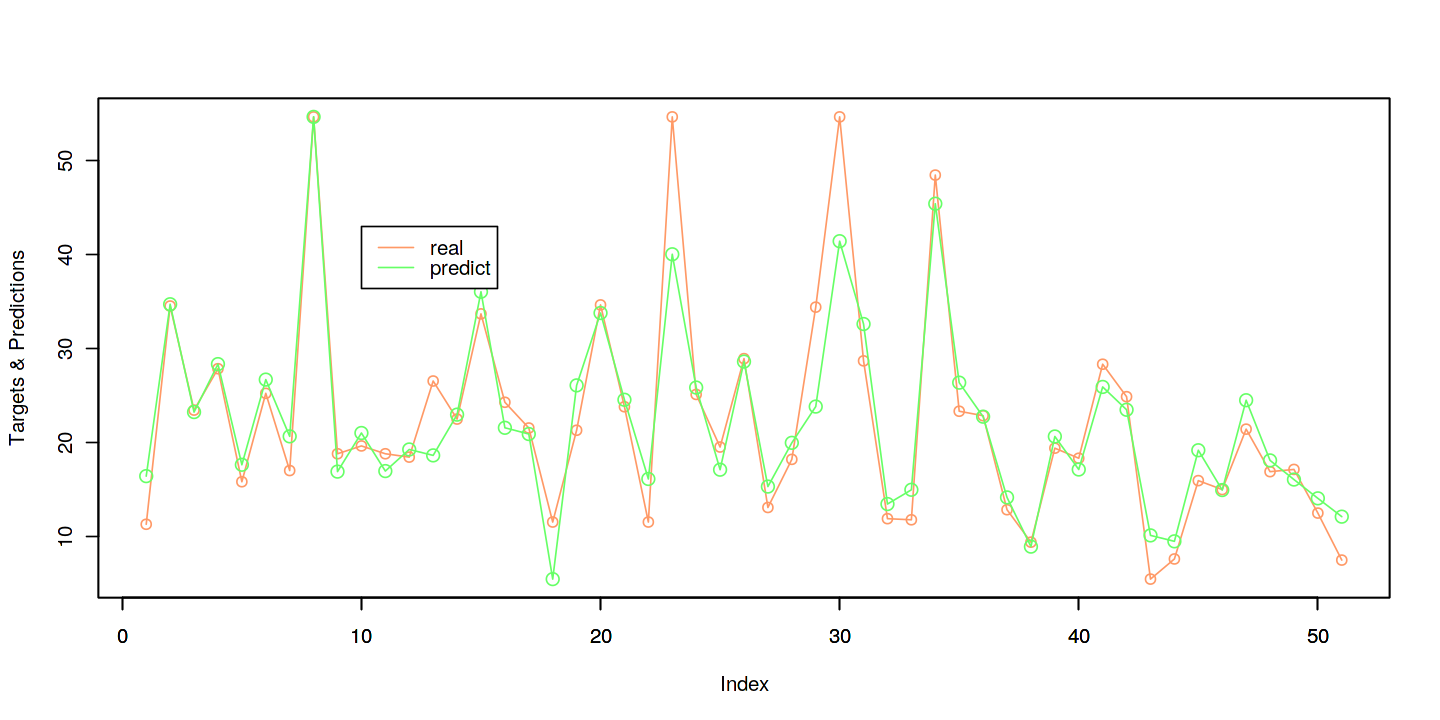

In [12]:
rnnet<-nnet(x_train2,y_train2,
            size=52,trace=F,maxit=2*10^3,
            linout=T,decay=.1^4)
py_test2<-predict(rnnet,x_test2,type="raw")
options(repr.plot.width=12,repr.plot.height=6)
plot(y_test2,col="#ff9966",type="o",
     xlab='',ylab='',yaxt='n'); par(new=T)
plot(py_test2,col="#66ff66",type="o",
     cex=1.3,ylab='Targets & Predictions')
legend(10,43,legend=c("real","predict"),
       col=c("#ff9966","#66ff66"),lty=c(1,1))
rnnet

$loss
[1] 11.57324

$mean_absolute_error
[1] 2.503596

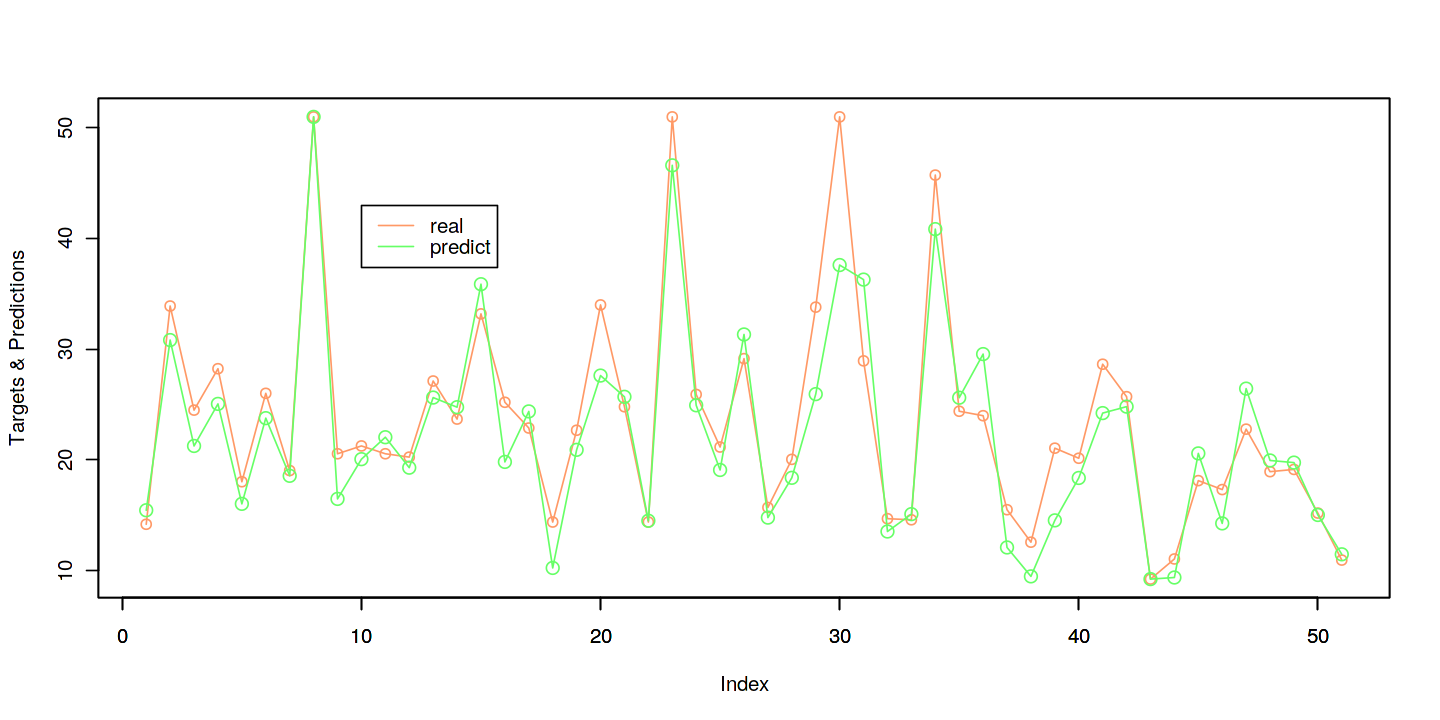

In [13]:
mlpks<-keras_model_sequential()
mlpks %>%  
layer_dense(832,input_shape=c(13)) %>%  
layer_activation_leaky_relu(alpha=.025) %>%  
layer_dense(104) %>%  
layer_activation_leaky_relu(alpha=.025) %>%  
layer_dense(1)
mlpks %>%
    compile(loss="mse",optimizer="rmsprop",metrics="mae")
cb<-list(callback_model_checkpoint(fw2,save_best_only=T),
         callback_reduce_lr_on_plateau(monitor="val_loss",factor=.75))
mlp_fit<-mlpks %>%
    fit(x=x_train2,y=y_train2,callbacks=cb,
        validation_data=list(x_valid2,y_valid2),
        shuffle=T,batch_size=24,epochs=300)
load_model_weights_hdf5(mlpks,fw2)
p2y_test2<-predict(mlpks,x_test2,type="raw")
options(repr.plot.width=12,repr.plot.height=6)
plot(y_test2,col="#ff9966",type="o",
     xlab='',ylab='',yaxt='n'); par(new=T)
plot(p2y_test2,col="#66ff66",type="o",
     cex=1.3,ylab='Targets & Predictions')
legend(10,43,legend=c("real","predict"),
       col=c("#ff9966","#66ff66"),lty=c(1,1))
mlpks %>% 
    evaluate(x_test2,y_test2)